Descriptive Statistics for IoT Data:
          tempreature   humidity  water_level
mean        18.760113  50.329308    79.401587
std          7.143422  22.995645    36.824610
median      17.000000  59.000000   100.000000
skewness     0.455618  -1.154149    -1.490428
kurtosis    -0.935960   0.280461     0.449579

Correlation Matrix for IoT Data:
             tempreature  humidity  water_level
tempreature     1.000000 -0.138722    -0.251429
humidity       -0.138722  1.000000    -0.058851
water_level    -0.251429 -0.058851     1.000000


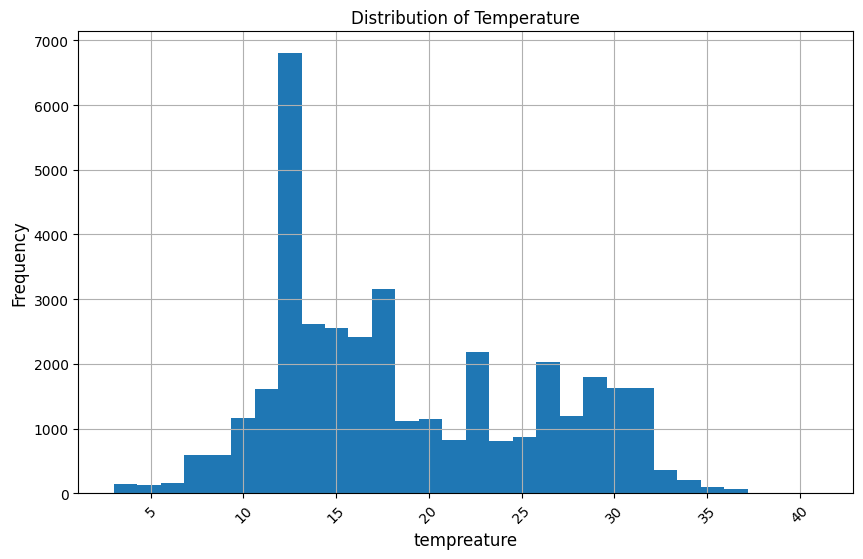

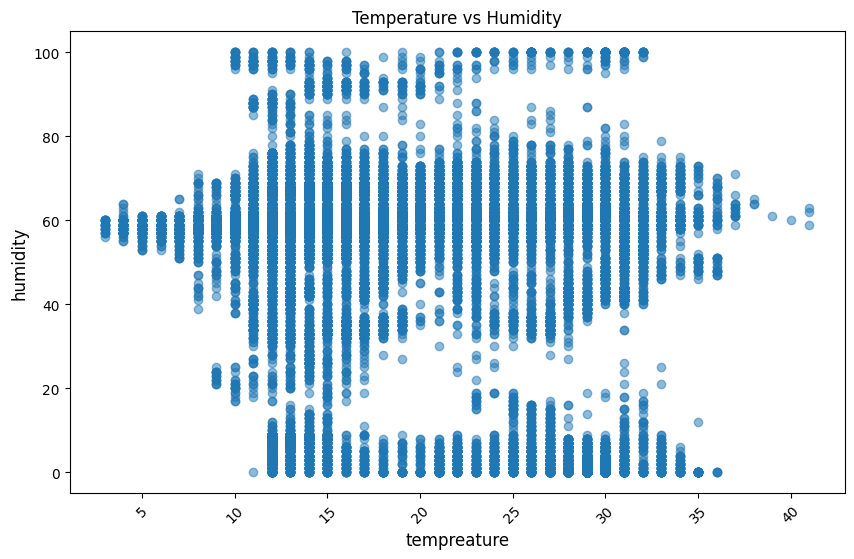

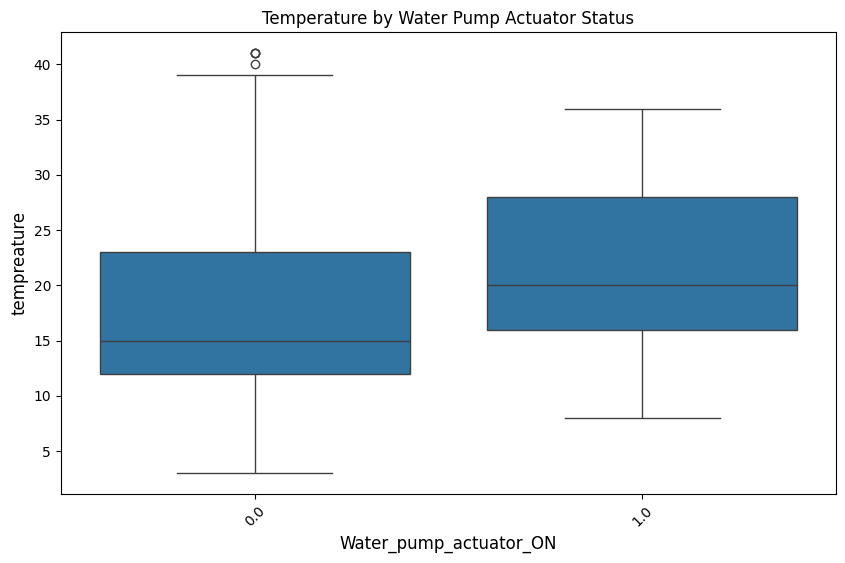

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
file_path_new = 'IoTProcessed_Data.csv'
df_new = pd.read_csv(file_path_new)

# Select important columns for analysis
columns_of_interest_new = ['tempreature', 'humidity', 'water_level']
df_subset_new = df_new[columns_of_interest_new]

# Define the display_statistics function
def display_statistics(data):
    """
    Calculates and displays mean, median, skewness, kurtosis, and standard deviation for the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    """
    statistics = data.describe().loc[['mean', 'std']]
    statistics.loc['median'] = data.median()
    statistics.loc['skewness'] = data.skew()
    statistics.loc['kurtosis'] = data.kurtosis()
    return statistics

# Calculate and display the desired statistics
statistics_new = display_statistics(df_subset_new)
print("Descriptive Statistics for IoT Data:")
print(statistics_new)

# Define the compute_correlation function
def compute_correlation(data):
    """
    Computes and returns the correlation matrix of the dataframe.
    Only numeric columns are considered.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    pd.DataFrame: The correlation matrix.
    """
    numeric_data = data.select_dtypes(include=[float, int])
    return numeric_data.corr()

# Compute the correlation matrix
correlation_matrix_new = compute_correlation(df_subset_new)
print("\nCorrelation Matrix for IoT Data:")
print(correlation_matrix_new)

# Function to create a histogram
def plot_histogram(data, column, title):
    """
    Plots a histogram for a specified column in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    column (str): The column name for which to plot the histogram.
    title (str): The title of the histogram.
    """
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=30)
    plt.title(title)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Function to create a scatter plot
def plot_scatter(data, x_column, y_column, title):
    """
    Plots a scatter plot for specified x and y columns in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    title (str): The title of the scatter plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Function to create a box plot
def plot_boxplot(data, x_column, y_column, title):
    """
    Plots a box plot for a specified x and y column in the dataframe.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    title (str): The title of the box plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Plot the graphs
# Histogram for temperature
plot_histogram(df_subset_new, 'tempreature', 'Distribution of Temperature')

# Scatter plot for temperature vs humidity
plot_scatter(df_subset_new, 'tempreature', 'humidity', 'Temperature vs Humidity')

# Box plot for temperature by water pump actuator status (ON/OFF)
plot_boxplot(df_new, 'Water_pump_actuator_ON', 'tempreature', 'Temperature by Water Pump Actuator Status')
